# Instructions
------------
This file contains code that helps you get started on the linear regression exercise. 

You will need to complete the following functions in this exericse:

* gradientDescentMulti.m
* computeCostMulti.m
* featureNormalize.m
* normalEqn.m

For this part of the exercise, you will need to change some parts of the code below for various experiments (e.g., changing learning rates).

<hr>

# Part 1: Feature Normalization
---

In [ ]:
import numpy as np
import pandas as pd

def featureNormalize(X):
    """
    FEATURENORMALIZE Normalizes the features in X 
    FEATURENORMALIZE(X) returns a normalized version of X where   
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    
    n = X.shape[1]
    X_arr = np.asarray(X)
    X_norm = X_arr.astype('float')
    mu = np.zeros([1, n])
    sigma = np.zeros([1, n])

    for i in range(n):
        avg = np.mean(X_arr[:, i])
        deviation = np.std(X_arr[:, i])

        X_norm[:, i] = X_norm[:, i] - float(avg)
        X_norm[:, i] = X_norm[:, i] / float(deviation)

        mu[:, i] = avg
        sigma[:, i] = deviation
        
    return X_norm, mu, sigma

In [ ]:
# Load Data
data = pd.read_csv('ex1data2.txt', sep=",", header=None)

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m = len(y)

# Print out some data points
print('First 10 examples from the dataset:')
for i in range(10):
    print('x = [{0}],\ny = {1}\n----'.format(X.loc[i], y[i]))

# Scale features and set them to zero mean
print('Normalizing Features ...')

X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.hstack( ((np.ones([m, 1])), (X)) ) # Add a column of ones to X

<hr>

## Part 2: Gradient Descent
---

In [ ]:
def computeCostMulti(X, y, theta):
    """
    COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """

    # Initialize some useful values
    m = len(y) # number of training examples
    J = 0

    h = X @ theta
    h = np.ravel(h)
    squaredErrors = np.square(h - y)
    J = (1 / (2 * m)) * sum(squaredErrors)
    
    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros([num_iters, 1])

    for iter in range(num_iters):
        h = X @ theta
        h = np.ravel(h)
        theta = theta - alpha * (1 / m) * (X.T @ (h - y).reshape((m,1)))
      
        J_history[iter] = computeCostMulti(X, y, np.asmatrix(theta))
                                           
    return theta, J_history

Running gradient descent ...


/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


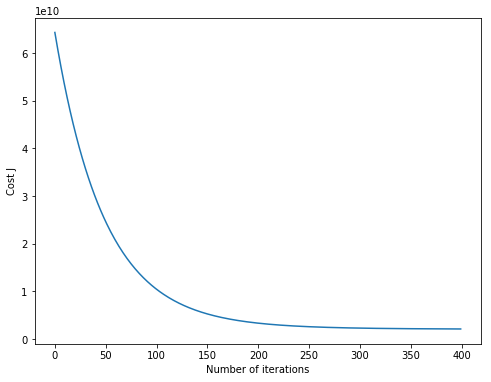

Theta computed from gradient descent:
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [197]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros([3, 1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
fig = plt.figure(figsize=(8, 6))

x = np.array(range(0, np.size(J_history)))
ones = np.ones([len(x)])
x_stack = np.vstack( ((ones), (x)) )
plt.plot(x_stack[1], J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Display gradient descent's result
print('Theta computed from gradient descent:');
print(theta)